# 4. KNN Algorithm

In [1]:
# Import pandas library for data manipulation
import pandas as pd

# Import numpy library for numerical operations  
import numpy as np  

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for data visualization
import seaborn as sns

# Import the train_test_split function for splitting the data into train and test sets
from sklearn.model_selection import train_test_split

# Import the classification_report function for generating a classification report
from sklearn.metrics import classification_report

# Import the GridSearchCV class for performing grid search with cross-validation
from sklearn.model_selection import GridSearchCV

# Import the KNeighborsClassifier class for K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier  

In [2]:
# Read the CSV file 'milk.csv' into a pandas DataFrame 'df'
df = pd.read_csv("Blood_donation.csv")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
# Rename target column for easier access
df.rename(columns={'whether he/she donated blood in March 2007': 'Donated'}, inplace=True)

In [4]:
# Shows a tuple with row and column size
df.shape

(748, 5)

In [5]:
# Display the first few rows of the DataFrame 'df' to get an overview of the data
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
# Display summary statistics for the DataFrame 'df' to understand the distribution of the data
df.describe()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:

# Check the data types of each column in the DataFrame 'df' to ensure they are appropriate for analysis
df.dtypes

Recency (months)         int64
Frequency (times)        int64
Monetary (c.c. blood)    int64
Time (months)            int64
Donated                  int64
dtype: object

In [8]:
# Display a concise summary of the DataFrame 'df', including the number of non-null entries and the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Donated                748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [9]:
# Check for missing values (NaNs) in each column of the DataFrame 'df' and compute their sum
df.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
Donated                  0
dtype: int64

## Five Interesting Insights from Dataset

### 1. Recency vs. Donation Rate
Analyze how recent a donor’s last donation affects their likelihood of donating in March 2007.

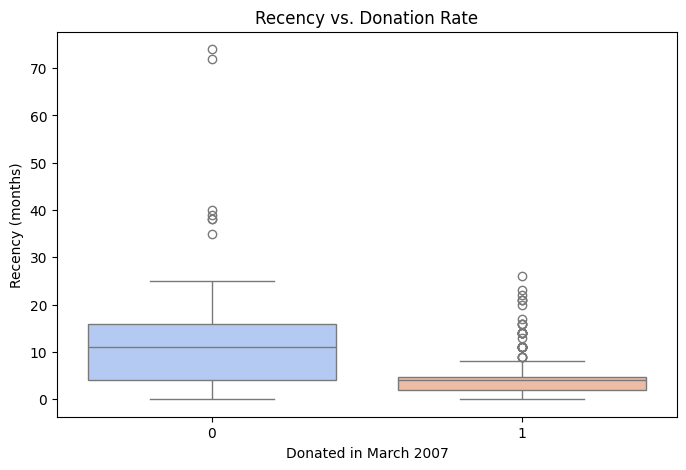

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Donated', y='Recency (months)', hue='Donated', data=df, palette='coolwarm', legend=False)
plt.title('Recency vs. Donation Rate')
plt.xlabel('Donated in March 2007')
plt.ylabel('Recency (months)')
plt.show()


### 2. Frequency of Donations and Donation Rate
Investigate if donors with a higher frequency of donations are more likely to donate again.

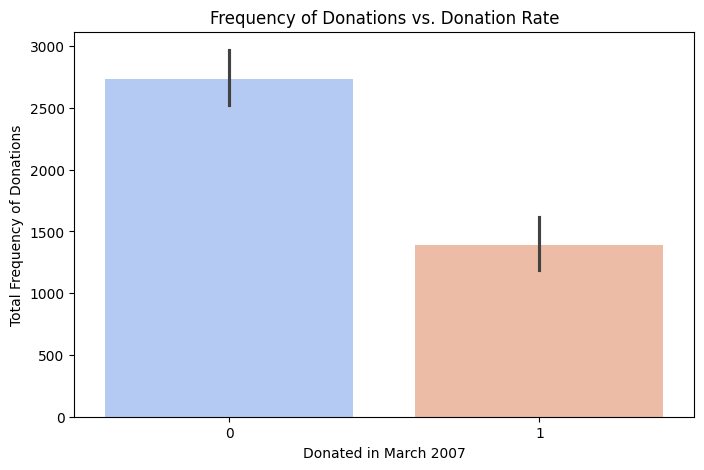

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Donated', y='Frequency (times)', hue='Donated', data=df, palette='coolwarm', estimator=sum, legend=False)
plt.title('Frequency of Donations vs. Donation Rate')
plt.xlabel('Donated in March 2007')
plt.ylabel('Total Frequency of Donations')
plt.show()


### 3. Monetary Contribution and Donation Rate
Determine if the amount of blood donated previously influences future donations

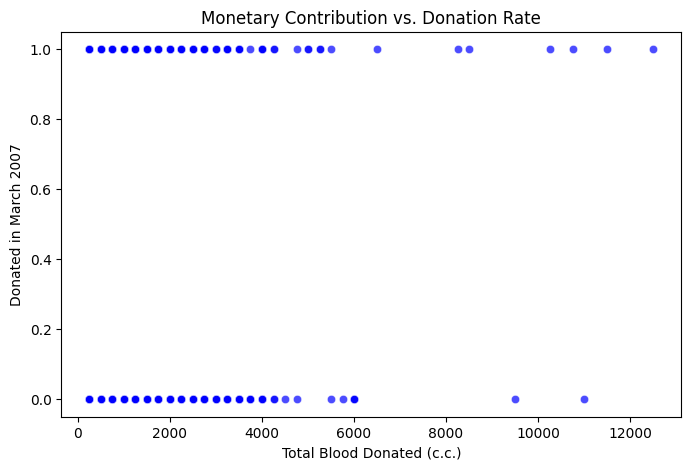

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Monetary (c.c. blood)', y='Donated', data=df, alpha=0.7, color='blue')
plt.title('Monetary Contribution vs. Donation Rate')
plt.xlabel('Total Blood Donated (c.c.)')
plt.ylabel('Donated in March 2007')
plt.show()


### 4. Time Since First Donation vs. Recency
Understand how long-term donors behave compared to newer donors.

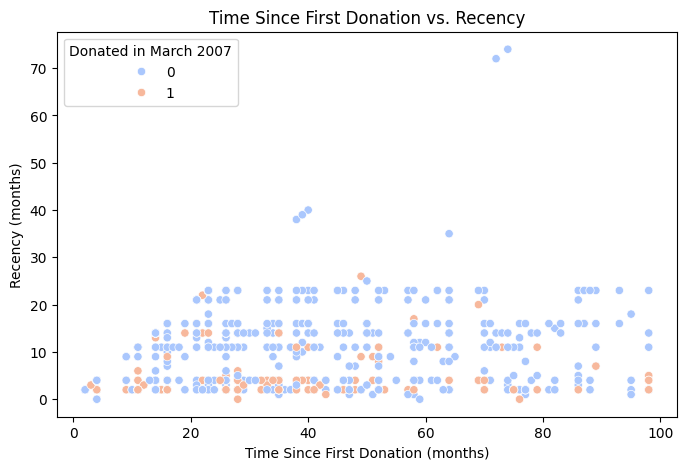

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Time (months)', y='Recency (months)', hue='Donated', data=df, palette='coolwarm')
plt.title('Time Since First Donation vs. Recency')
plt.xlabel('Time Since First Donation (months)')
plt.ylabel('Recency (months)')
plt.legend(title='Donated in March 2007')
plt.show()

### 5. Impact of Time Since First Donation on Donation Likelihood
Analyze whether donors who have been donating for a long time (high Time (months)) are more likely to continue donating.

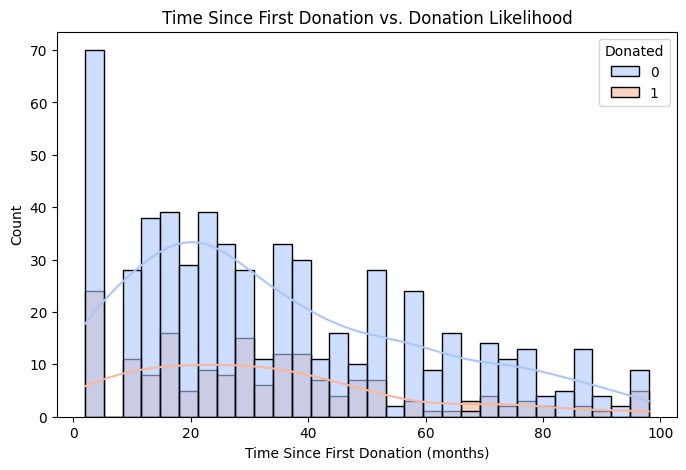

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df, x='Time (months)', hue='Donated', kde=True, bins=30, palette='coolwarm', alpha=0.6)
plt.title('Time Since First Donation vs. Donation Likelihood')
plt.xlabel('Time Since First Donation (months)')
plt.ylabel('Count')
plt.show()  # Remove manual plt.legend()


In [15]:
# Create a new DataFrame 'x' by dropping the specified column from the original DataFrame 'df'
x = df.drop(columns="Donated")
x


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [16]:
# Create a Series 'y' containing data from the specified column of the original DataFrame 'df'
y = df["Donated"]
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: Donated, Length: 748, dtype: int64

In [17]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [18]:
# Create a KNN classifier object
kn = KNeighborsClassifier()


In [19]:
# Train (fit) the KNN classifier model on the training data
kn.fit(x_train, y_train)


KNeighborsClassifier()

In [20]:
# Use the trained KNN classifier model to predict the target variable for the test data
y_pred = kn.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0])

In [21]:
ac = accuracy_score(y_test, y_pred)
ac

NameError: name 'accuracy_score' is not defined

In [ ]:

# Grid search for 'n_neighbors'
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=6)
grid_search.fit(x_train, y_train)
 

In [ ]:
# Get the best parameter
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_n_neighbors}")

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results[['param_n_neighbors', 'mean_test_score']]

In [ ]:
# Calculate the accuracy score of the predictions made by the KNN classifier model
ac = accuracy_score(y_test, y_pred)
ac

In [ ]:
# Generate a classification report based on the actual and predicted values
print(classification_report(y_test, y_pred))
